## Training the model using cleaned_demographics.csv dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Stats Dataset Cleaned/cleaned_demographics.csv')
df.head()

,Year,Territory of asylum or residence,Location Name,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,2001,Afghanistan,Various,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,2001,Afghanistan,Herat,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2001,Angola,Viana,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,2001,Angola,Moxico,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [4]:
### dropping the unecessary columns which are not numeric

df.drop(columns=['Year', 'Territory of asylum or residence', 'Location Name'], axis=1, inplace=True)

In [5]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [6]:
df.columns

Index(['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59',
       'Female 60+', 'F: Unknown', 'F: Total', 'Male 0-4', 'Male 5-11',
       'Male 5-17', 'Male 18-59', 'Male 60+', 'M: Unknown', 'M: Total'],
      dtype='object')

In [7]:
### combining the total male and female population into one single output feature

df['Total Population'] = pd.to_numeric(df['F: Total'], errors='coerce') + pd.to_numeric(df['M: Total'], errors='coerce')


In [8]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0,2496.0


In [9]:
df.drop(columns=['F: Total', 'M: Total'], axis=1, inplace=True)
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0,2496.0


### Now we have a dataset with only numeric features. Now we split the features into independent and dependent features as x and y respectively. 

In [10]:
x=df.drop('Total Population', axis=1)
y=df['Total Population']

In [12]:
x.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0


In [13]:
y.head()

0          4.0
1    1216624.0
2          2.0
3       6559.0
4       2496.0
Name: Total Population, dtype: float64

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [17]:
x_train.shape, x_test.shape

((12848, 12), (5507, 12))

In [18]:
### function to find out the values of correlation greater than threshold

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features=correlation(x_train, 0.70)

In [20]:
### drop features above threshold

x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

In [21]:
x_train.shape, x_test.shape

((12848, 3), (5507, 3))

### Standardizing the data using standardscaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

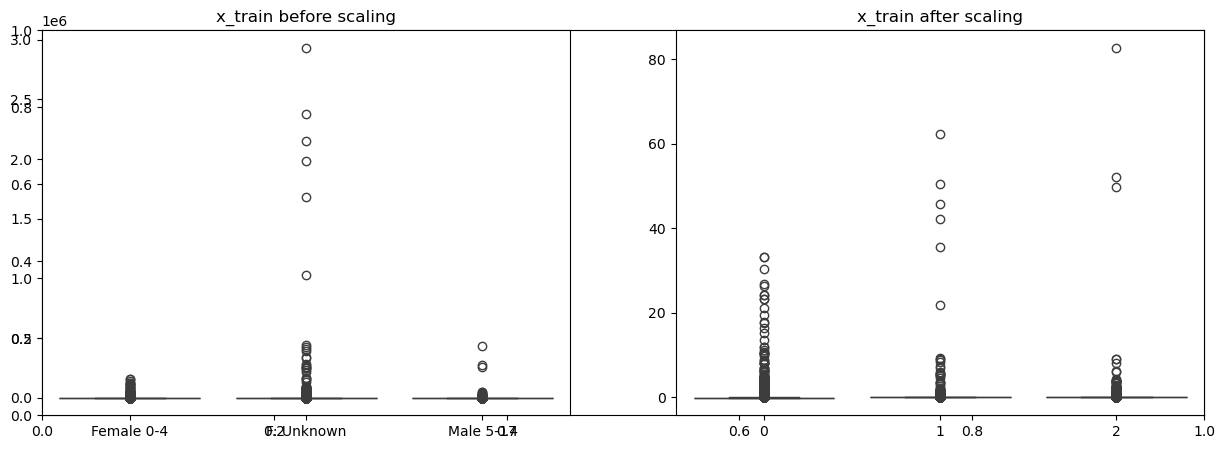

In [25]:
### boxplots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

Text(0.5, 1.0, 'x_train after scaling')

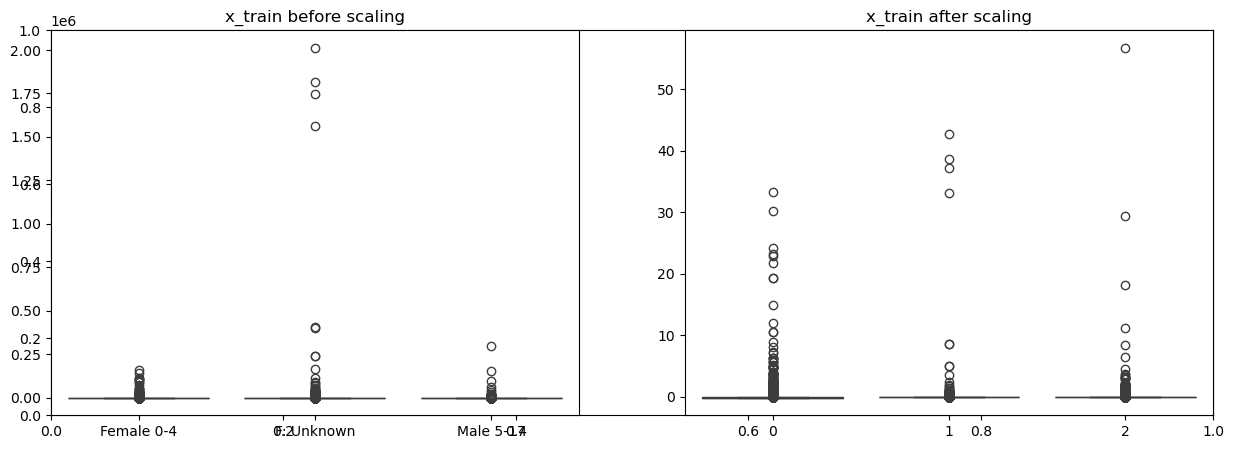

In [26]:
### boxplots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_test)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_test_scaled)
plt.title('x_train after scaling')

### Doing the regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression=LinearRegression()

In [30]:
regression.fit(x_train_scaled,y_train)
y_predicted = regression.predict(x_test_scaled)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
accuracy = r2_score(y_test, y_predicted)
mae=mean_absolute_error(y_test, y_predicted)
mse=mean_squared_error(y_test, y_predicted)
print(accuracy)
print(mae)
print(mse)

0.9582088378707041
4988.650315310427
835684425.1526853
